In [1]:
%%capture
!pip install qldpc

In [2]:
import networkx as nx
import qldpc
from qldpc import codes

# Classical codes

In [3]:
# ring code: repetition code with periodic boundary conditions
code = codes.RingCode(5)
print(code.matrix)
print()
print(code.get_code_params())

[[1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [1 0 0 0 1]]

(5, 1, 5, 2)


In [4]:
# Hamming code: columns of parity check matrix = nonzero code words
code = codes.HammingCode(3)
print(code.matrix)
print()
print(code.get_code_params())

[[0 0 0 1 1 1 1]
 [0 1 1 0 0 1 1]
 [1 0 1 0 1 0 1]]

(7, 4, 3, 4)


In [5]:
# the dual code of the Hamming code is a simplex code
print((~code).matrix)

[[1 0 0 0 0 1 1]
 [0 1 0 0 1 0 1]
 [0 0 1 0 1 1 0]
 [0 0 0 1 1 1 1]]


In [6]:
# random classical code on 5 bits with 3 checks
code = codes.ClassicalCode.random(5, 3)
print(code.matrix)
print()
print(code.get_code_params())

[[0 1 1 0 1]
 [0 0 1 0 0]
 [1 1 0 1 0]]

(5, 2, 2, 3)


In [7]:
# random code over trinary field
code = codes.ClassicalCode.random(5, 3, field=3)
print(code.matrix)
print()
print(code.get_code_params())

[[2 2 2 0 1]
 [2 2 1 2 1]
 [1 1 2 1 0]]

(5, 2, 2, 5)


# Quantum codes: basics

In [8]:
# hypergraph product code
rep_code = codes.RepetitionCode(3)
surface_code = codes.HGPCode(rep_code, rep_code)
print(surface_code.get_code_params())

(13, 1, 3, 4)


In [9]:
# sub-code parity check matrices
print(surface_code.code_x.matrix)
print()
print(surface_code.code_z.matrix)

[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]

[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]


In [10]:
# logical operators
print(surface_code.get_logical_ops())

[[[0 0 0 0 0 0 1 1 1 0 0 0 0]]

 [[0 0 1 0 0 1 0 0 1 0 0 0 0]]]


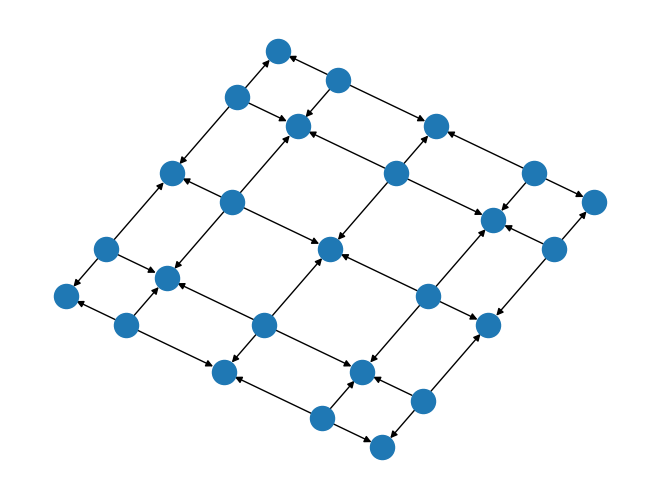

In [11]:
# surface code Tanner graph
nx.draw_spectral(surface_code.graph)

In [12]:
# toric code
ring_code = codes.RingCode(3)
toric_code = codes.HGPCode(ring_code, ring_code)
print(toric_code.get_code_params())
print()
print(toric_code.get_logical_ops())

(18, 2, 3, 4)

[[[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1]]

 [[0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]]]


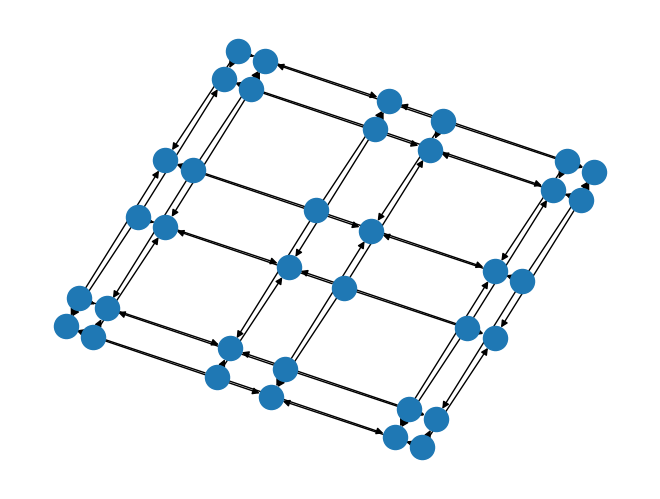

In [13]:
# toric code Tanner graph
nx.draw_spectral(toric_code.graph)

# Quasi-cyclic codes (IBM)
https://arxiv.org/pdf/2308.07915.pdf

In [14]:
# second-to-last code in Table 3: [[n, k, d]] = [[360, 12, <=24]]
dims = (30, 6)
terms_a = [("x", 9), ("y", 1), ("y", 2)]
terms_b = [("y", 3), ("x", 25), ("x", 26)]
code = codes.QCCode(dims, terms_a, terms_b)

print("number of physical qubits:", code.num_qubits)
print("number of logical qubits:", code.dimension)

number of physical qubits: 360
number of logical qubits: 12


In [15]:
# find an upper bound to the code distance via Monte Carlo, 10 trials
for _ in range(10):
    print(code.get_distance(bound=True))

30
30
18
16
22
16
14
62
60
26


In [16]:
# better distance bound with more trials
best_bound = code.num_qubits
for trial in range(1000):
    dist_bound = code.get_distance(bound=True)
    if dist_bound < best_bound:
        print("trial, bound:", trial, dist_bound)
        best_bound = dist_bound

trial, bound: 0 16
trial, bound: 2 14
trial, bound: 14 12


## Additional features:
- decoder integration
- more code families (generalized bicycle, lifted product, quantum Tanner)
- abstract algebra module (needed for lifted product and quantum Tanner codes)

## Pending:
- QEC circuit synthesis
- Stim integration
- even more code families
- default/randomized code constructions